# Image Classification - Malaria Dataset (Curated by UAB)

-Mark Reuter

-Surya Vamsi Sagi

-Ranjan Hebbar Seethur Raviraj

## Motivation and Objective
This section will introduce the Image Classification Problem. THe objective here is to assign an input image to one lable from a set of catagories. The general idea would be to take the inpoout image and assign probabilities to different lables. A computer image is represented as a 3-dimentional array of number, containg width x height x colour channel (RGB in many cases)


## Challenges:

Since this task of recognizing a visual concept (e.g. cat) is relatively trivial for a human to perform, it is worth considering the challenges involved from the perspective of a Computer Vision algorithm. As we present (an inexhaustive) list of challenges below, keep in mind the raw representation of images as a 3-D array of brightness values:

* Viewpoint variation: A single instance of an object can be oriented in many ways with respect to the camera.
* Scale variation. Visual classes often exhibit variation in their size (size in the real world, not only in terms of their extent in the image).
* Deformation: Many objects of interest are not rigid bodies and can be deformed in extreme ways.
* Occlusion: The objects of interest can be occluded. Sometimes only a small portion of an object (as little as few pixels) could be visible.
* Illumination conditions: The effects of illumination are drastic on the pixel level.
* Background clutter: The objects of interest may blend into their environment, making them hard to identify.
* Intra-class variation: The classes of interest can often be relatively broad, such as chair. There are many different types of these objects, each with their own appearance.

A good image classification model must be invariant to the cross product of all these variations, while simultaneously retaining sensitivity to the inter-class variations.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random
import functools

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import validation_curve

plt.style.use('ggplot')

## Data Preprocessing

This step includes adjusting the size of various images to a fixed size and converting the image into an ndarray so that we can apply the algorithm

Data Conversion and Setup

We used cv2 library to read the image and convert the pixel values into an array

We also need to flatten out the 3d array representation of the image into a single dimension array for applying the algorithms

The labelled datasets are shuffled for efficient model training


(54, 59, 3)

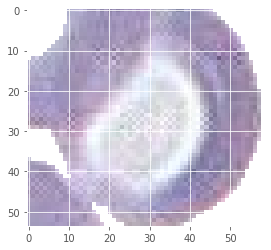

In [2]:
#DATADIR = "/home/mark/uab curated"
#DATADIR = "C:/Users/Ranjan Hebbar/OneDrive/CS-641/Homeworks/Project/uab curated"
DATADIR = "/Users/maclaptop1/Documents/surya/CS 641/uab curated"
Class_Label = ['0','1']
IMG_SIZE = 60 # For Stadarizing all the image sizes to 60
for category in Class_Label:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, )
        break
    break

img_array.shape #just took one image for the sake of viewing

(60, 60, 3)

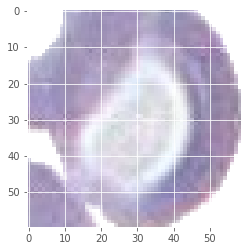

In [3]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
new_array.shape # viewing the image after scaling to 60

# Data Preparation

## Splitting the Dataset

Let's divide the  data into training and test data set. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

We split the data 70/30 into training and testing sets. When training the classifiers, we used k-fold cross validation with 4 sets (25% each)

In [4]:
training_data = []
length0 = 0
length1 = 0
def create_training_data():  # generating the training data set.
    for category in Class_Label:
        path = os.path.join(DATADIR, category)
        class_num = Class_Label.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass           


create_training_data()
for sample in training_data:
    if(sample[1] == 0):
        length0 = length0 +1
    if(sample[1] == 1):
        length1 = length1 + 1

print(length0)  # support for class 0
print(length1)  # support for class 1

1531
1034


In [5]:
random.shuffle(training_data)

X = []
y = []   # shuffling the training data since we read one folder images followed by other

In [6]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [7]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(X.shape)
X = np.reshape(X,(2565,10800))
X.shape   # flattening the pixel values

(2565, 60, 60, 3)


(2565, 10800)

In [8]:
X_train, X_test_validate, y_train, y_test_validate = train_test_split(X, y, test_size = 0.3, random_state = 100)
X_test, X_validate, y_test, y_validate = train_test_split(X_test_validate, y_test_validate, test_size = 0.5, random_state = 100)

# Model Testing

# Decision Tree Classifier

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

In [ ]:
train_scores_dt, valid_scores_dt = validation_curve(DecisionTreeClassifier(criterion = 'entropy', random_state = 0), X_train, y_train, "max_leaf_nodes", range(2, 41), cv=4)

In [ ]:
classifier_decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_leaf_nodes=13)
classifier_decision_tree.fit(X_train, y_train)
prediction_dt = classifier_decision_tree.predict(X_test)
validation_dt = classifier_decision_tree.predict(X_test_validate)

print('UAB Curated Dataset')
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(classifier_decision_tree.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(classifier_decision_tree.score(X_test, y_test)))
print('Accuracy of Decision Tree Classifier on validation set: {:.2f}'.format(classifier_decision_tree.score(X_validate, y_validate)))

print("\n Classification report for classifier %s:\n%s\n" % (classifier_decision_tree, metrics.classification_report(y_test_validate, validation_dt)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test_validate, validation_dt))

In [ ]:
train_scores_dt = list(map(lambda x: 1 - ((x[0] + x[1] + x[2] + x[3]) / 4), train_scores_dt))
valid_scores_dt = list(map(lambda x: 1 - ((x[0] + x[1] + x[2] + x[3]) / 4), valid_scores_dt))

plt.plot(list(range(2, 41)), train_scores_dt, "bo")
plt.plot(list(range(2, 41)), valid_scores_dt, "r+")
plt.show()

dt_csv = functools.reduce(lambda x,y: x + y, # concat into a single string
                     map(lambda x: "{},{},{}\n".format(x[0], x[1], x[2]), # concat the rows of the csv
                         zip(list(range(2, 41)), train_scores_dt, valid_scores_dt)))
dt_f = open("dt.csv", "w")
dt_f.write(dt_csv)
dt_f.close()

# Naïve Bayes 

In machine learning, naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models.

In [ ]:
classifier_NBC = GaussianNB()
classifier_NBC.fit(X_train, y_train)
prediction_NBC = classifier_NBC.predict(X_test)
validation_NBC = classifier_NBC.predict(X_validate)

print('UAB Curated Dataset')
print('Accuracy of Naïve Bayes Classifier on training set: {:.2f}'.format(classifier_NBC.score(X_train, y_train)))
print('Accuracy of Naïve Bayes Classifier on test set: {:.2f}'.format(classifier_NBC.score(X_test, y_test)))
print('Accuracy of Naïve Bayes Classifier on validation set: {:.2f}'.format(classifier_NBC.score(X_validate, y_validate)))

print("Classification report for classifier %s:\n%s\n" % (classifier_NBC, metrics.classification_report(y_test, prediction_NBC)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction_NBC))

# SVM

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.

In [ ]:
gamma_init = 1 / (10800 * X_train.var())
coefs_range = list(map(lambda x: gamma_init + ((((x - 10) / 10)) * gamma_init), range(1, 21)))
print(coefs_range)
train_scores_svm, valid_scores_svm = validation_curve(SVC(kernel='rbf'), X_train, y_train, "gamma", coefs_range, cv=4)

In [ ]:
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_train, y_train)
prediction_SVM = classifier_SVM.predict(X_test)
validation_SVM = classifier_SVM.predict(X_validate)

print('UAB Curated Dataset')
print('Accuracy of SVM Classifier on training set: {:.2f}'.format(classifier_SVM.score(X_train, y_train)))
print('Accuracy of SVM Classifier on test set: {:.2f}'.format(classifier_SVM.score(X_test, y_test)))
print('Accuracy of SVM Classifier on validation set: {:.2f}'.format(classifier_SVM.score(X_validate, y_validate)))

print("Classification report for classifier %s:\n%s\n" % (classifier_SVM, metrics.classification_report(y_test, prediction_SVM)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction_SVM))

In [ ]:
#train_scores_svm = list(map(lambda x: 1 - ((x[0] + x[1] + x[2] + x[3]) / 4), train_scores_svm))
#valid_scores_svm = list(map(lambda x: 1 - ((x[0] + x[1] + x[2] + x[3]) / 4), valid_scores_svm))

plt.plot(coefs_range, train_scores_svm, "bo")
plt.plot(coefs_range, valid_scores_svm, "r+")
plt.show()

svm_csv = functools.reduce(lambda x,y: x + y, # concat into a single string
                     map(lambda x: "{},{},{}\n".format(x[0], x[1], x[2]), # concat the rows of the csv
                         zip(coefs_range, train_scores_svm, valid_scores_svm)))
svm_csvf = open("svm.csv", "w")
svm_csvf.write(svm_csv)
svm_csvf.close()

# Random Forest Classifier

A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
train_scores_rf, valid_scores_rf = validation_curve(RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0), X_train, y_train, "max_leaf_nodes", range(2, 41), cv=4)

In [ ]:

classifier_RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, max_leaf_nodes=18)
classifier_RF.fit(X_train, y_train)
prediction_RF = classifier_RF.predict(X_test)
validation_RF = classifier_RF.predict(X_test_validate)

print('UAB Curated Dataset')
print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(classifier_RF.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(classifier_RF.score(X_test, y_test)))
print('Accuracy of Random Forest Classifier on validation set: {:.2f}'.format(classifier_RF.score(X_validate, y_validate)))


print("Classification report for classifier %s:\n%s\n" % (classifier_RF, metrics.classification_report(y_test_validate, validation_RF)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test_validate, validation_RF))

In [ ]:
#train_scores_rf = list(map(lambda x: 1 - ((x[0] + x[1] + x[2] + x[3]) / 4), train_scores_rf))
#valid_scores_rf = list(map(lambda x: 1 - ((x[0] + x[1] + x[2] + x[3]) / 4), valid_scores_rf))
import functools
plt.plot(list(range(2, 41)), train_scores_rf, "bo")
plt.plot(list(range(2, 41)), valid_scores_rf, "r+")
plt.show()

rf_csv = functools.reduce(lambda x,y: x + y, # concat into a single string
                     map(lambda x: "{},{},{}\n".format(x[0], x[1], x[2]), # concat the rows of the csv
                         zip(list(range(2, 41)), train_scores_rf, valid_scores_rf)))
rf_f = open("rf.csv", "w")
rf_f.write(rf_csv)
rf_f.close()

# Conclusion

##  Accuracy

1. Decision Tree Algorithm       — 80%
2. Naive Bayes                   — 68%
3. Support Vector Machines       — 87%
4. Random Forest Classification  — 94%
